In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('final_data.csv')
df.columns

Index(['CITY', 'DISTRICT', 'ADDRESS', 'TALUK', 'PINCODE', 'GENDER',
       'FAMILY_INCOME', 'CET_RANK', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'AdminYear',
       'SSLCTOTMARKS', 'PUCTOTMARKS', 'PUC_INSTITUTE', 'puc_yr_pass',
       'sslc_yr_pass', 'PCM_total', 'PCM %', 'STATE', 'Religion/ Caste'],
      dtype='object')

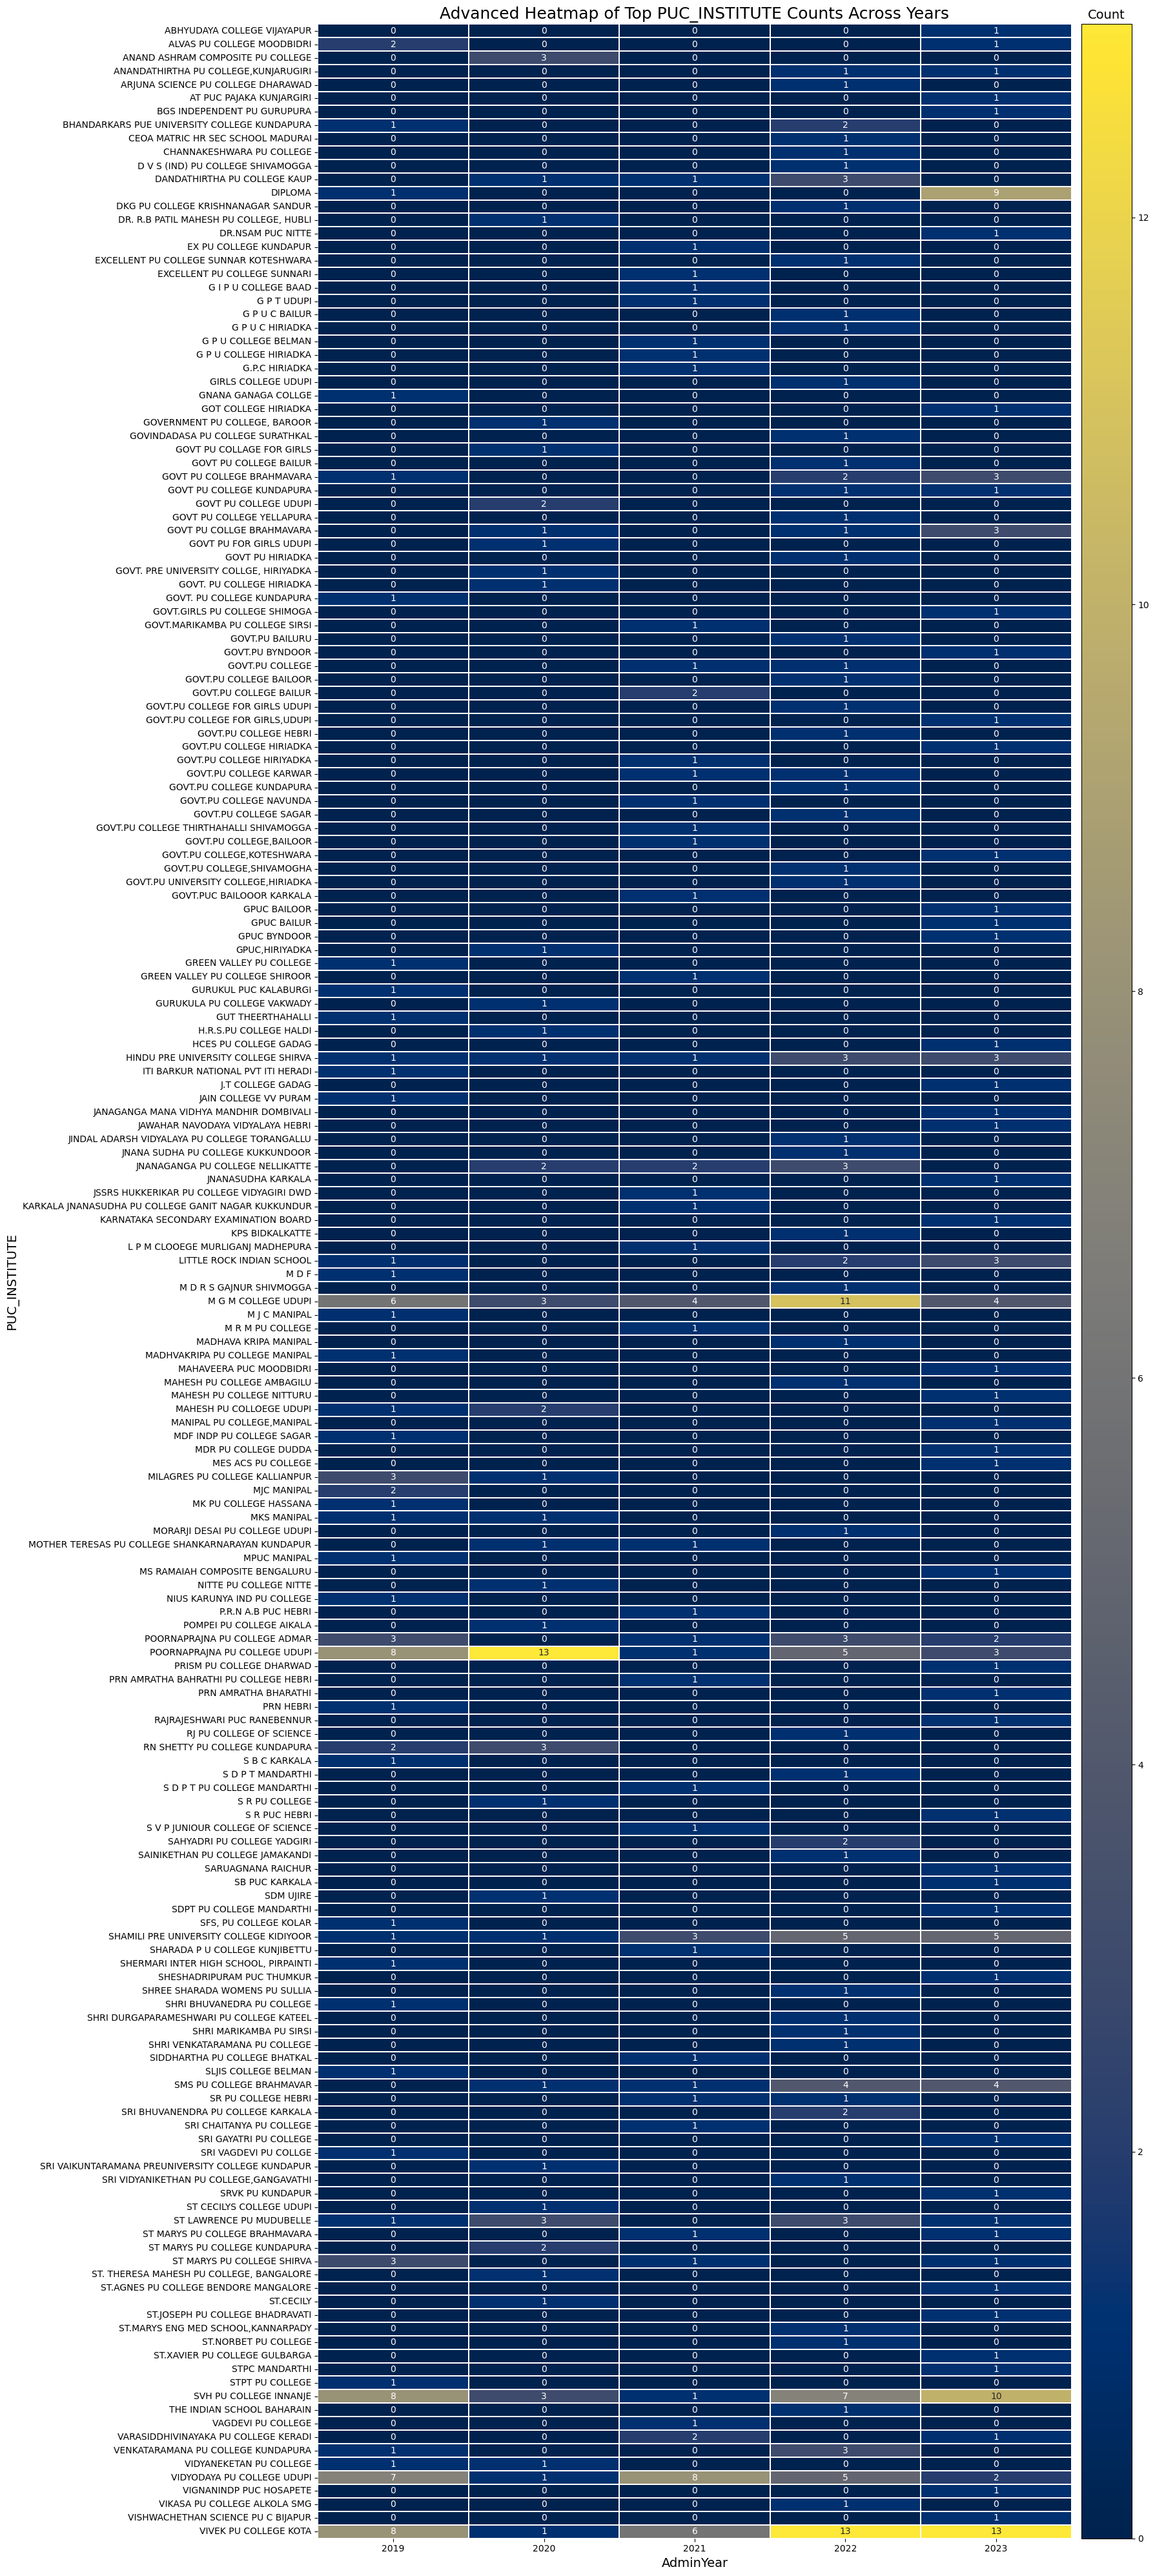

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
top_n = len(list(df['PUC_INSTITUTE'].unique()))

def aggregate_others(data, column, top_n):
    top_categories = data[column].value_counts().nlargest(top_n).index
    data[column] = data[column].apply(lambda x: x if x in top_categories else 'Others')
    return data
df_aggregated = aggregate_others(df.copy(), 'PUC_INSTITUTE', top_n)
# Assuming df_aggregated and heatmap_data are already defined as in your example
heatmap_data = df_aggregated.pivot_table(index='PUC_INSTITUTE', columns='AdminYear', aggfunc='size', fill_value=0)
# Create a figure and gridspec layout
fig = plt.figure(figsize=(18, 40))
gs = fig.add_gridspec(1, 2, width_ratios=[15, 1])  # 2 columns: heatmap and color bar

# Plot the heatmap
ax_heatmap = fig.add_subplot(gs[0, 0])
cluster_map = sns.heatmap(
    heatmap_data,
    cmap='cividis',
    annot=True,
    fmt='d',
    linewidths=.3,
    cbar=False,  # Disable automatic color bar
    ax=ax_heatmap
)

# Customize the plot
ax_heatmap.set_title('Advanced Heatmap of Top PUC_INSTITUTE Counts Across Years', fontsize=18)
ax_heatmap.set_xlabel('AdminYear', fontsize=14)
ax_heatmap.set_ylabel('PUC_INSTITUTE', fontsize=14)

# Add color bar manually
ax_colorbar = fig.add_subplot(gs[0, 1])
sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=heatmap_data.values.min(), vmax=heatmap_data.values.max()))
sm.set_array([])
fig.colorbar(sm, cax=ax_colorbar)
ax_colorbar.set_title('Count', fontsize=14)

plt.tight_layout()
plt.show()


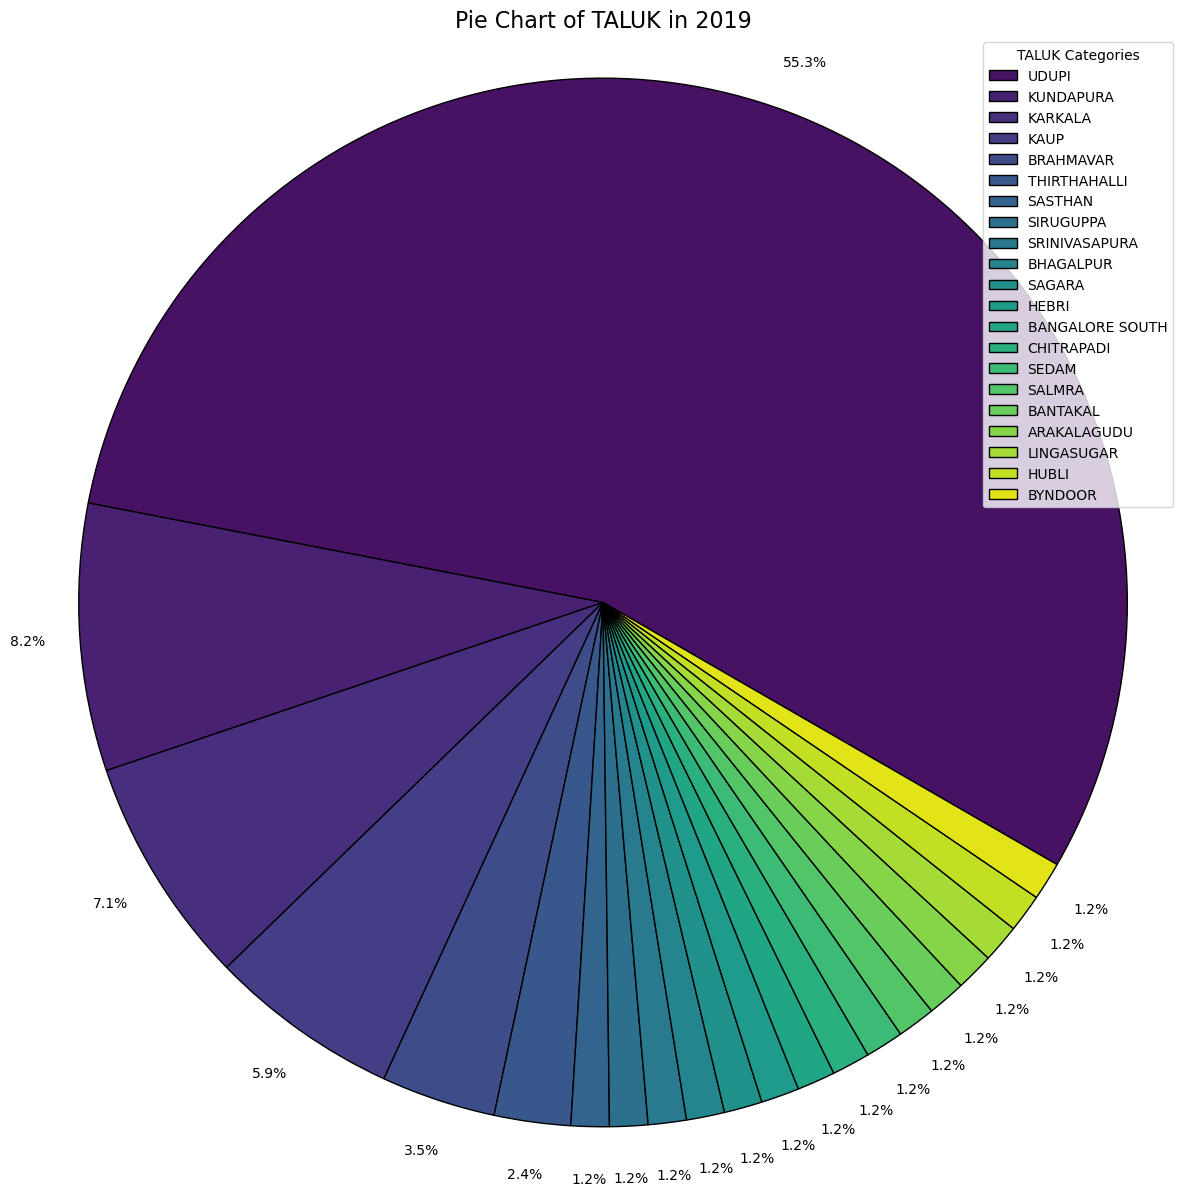

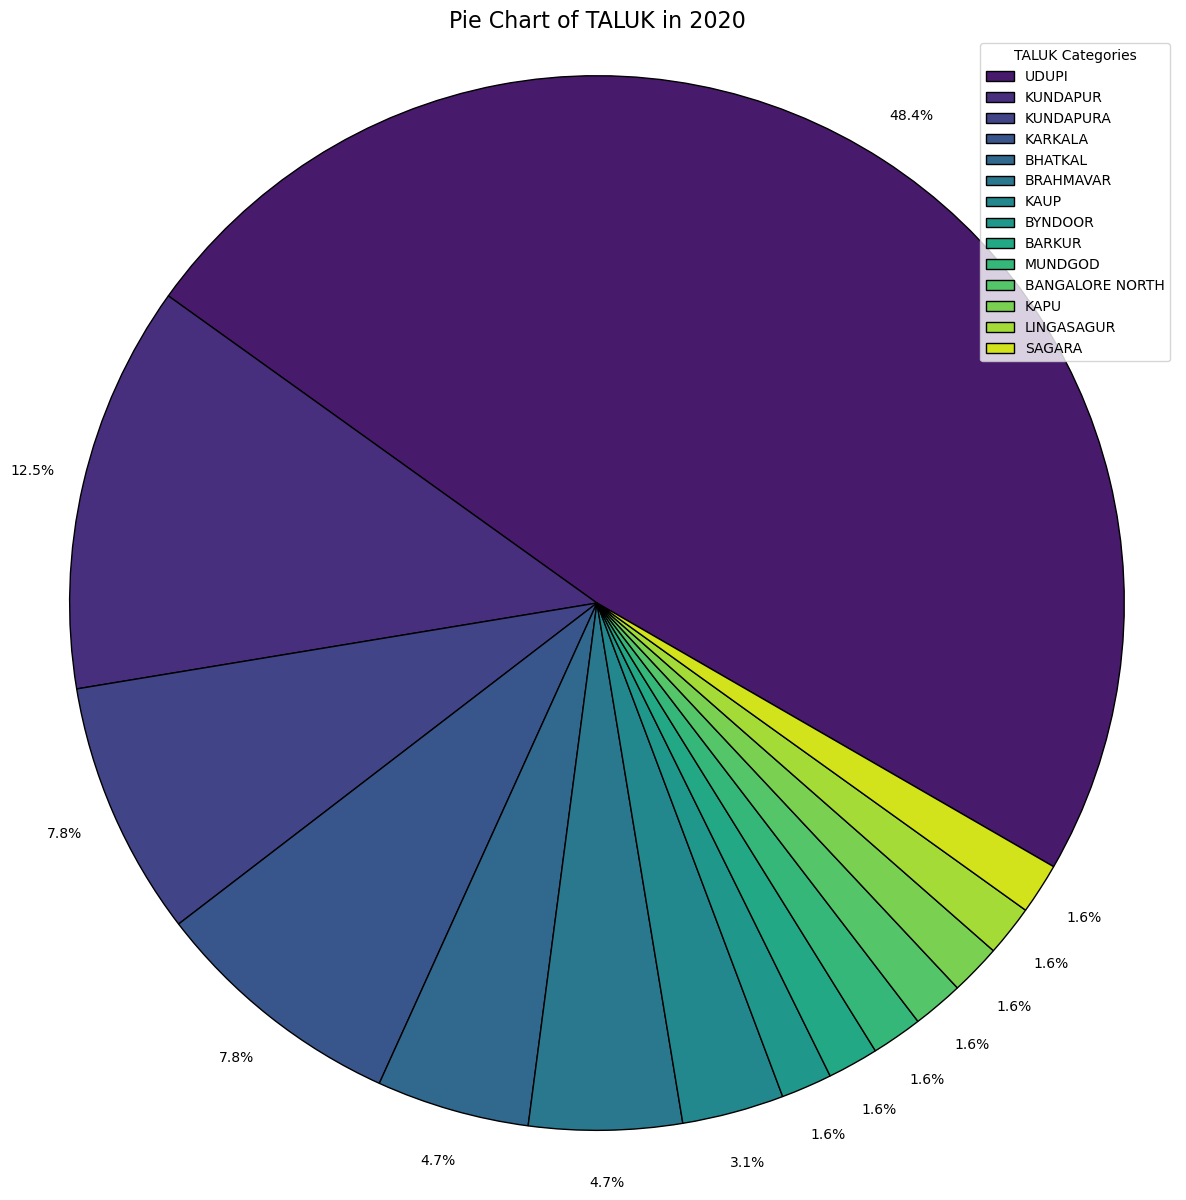

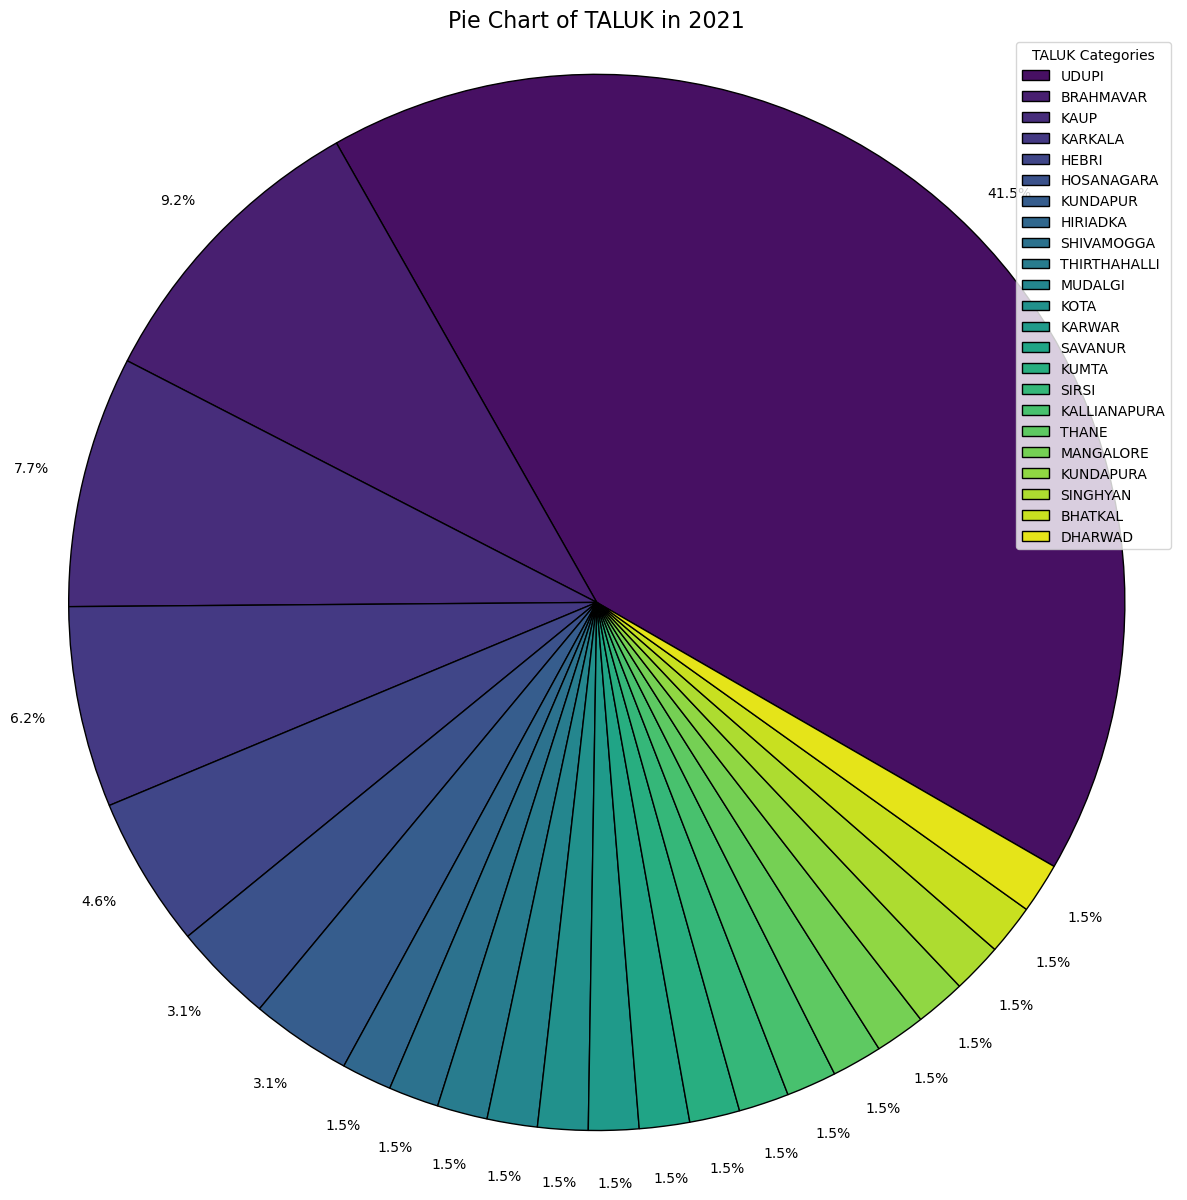

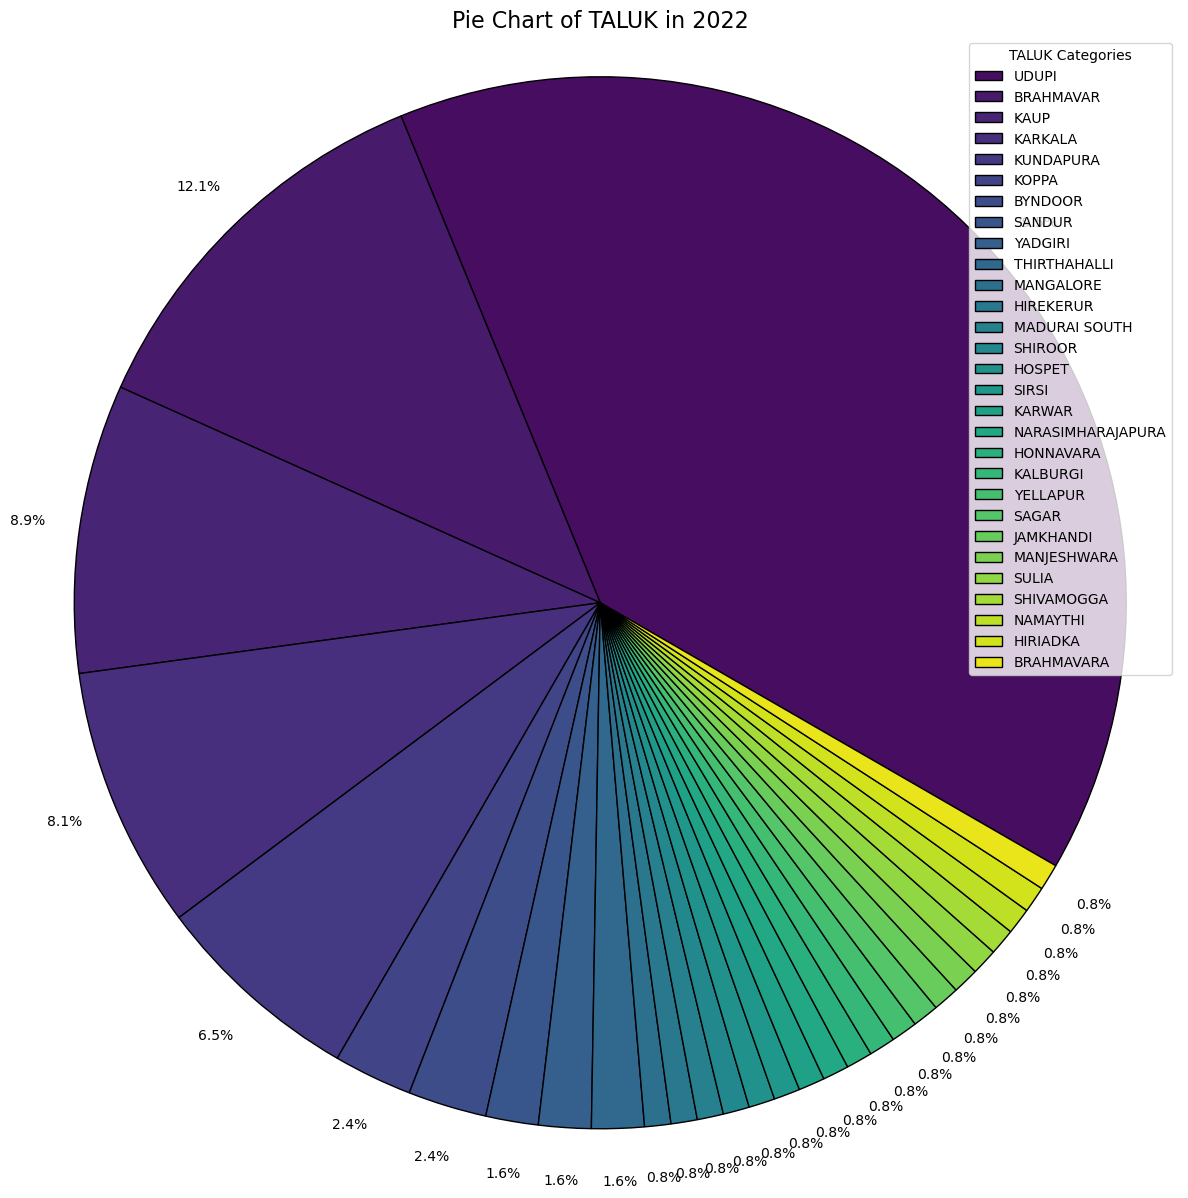

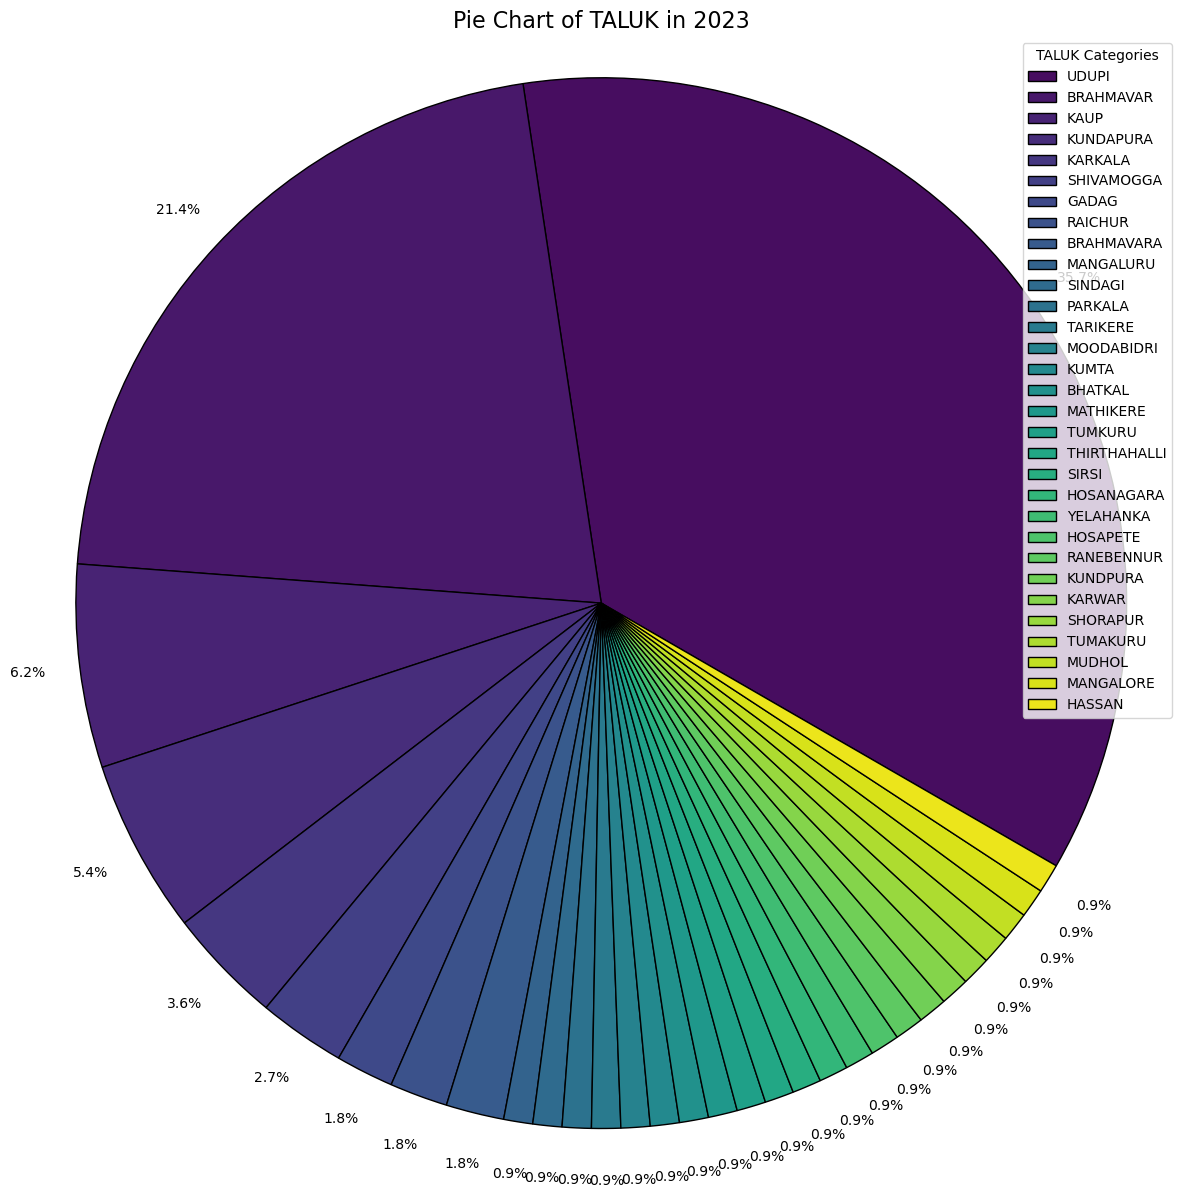

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data setup (replace with your actual data)
years = list(df['AdminYear'].unique())
categorical_cols = ['TALUK']

# Loop through each categorical column and each year
for col in categorical_cols:
    for year in years:
        plt.figure(figsize=(12, 12))  # Square figure for pie chart
        
        # Filter data for the specific year and column
        data_year = df[df['AdminYear'] == year][col].value_counts()
        
        # Plotting the pie chart with percentage and counts
        patches, autotexts = plt.pie(data_year, labels=None, 
                                           startangle=-30, 
                                           colors=sns.color_palette('viridis', len(data_year)), 
                                           wedgeprops={'edgecolor': 'black'})
        
        # Customize autopct label properties
        for autotext in autotexts:
            autotext.set_fontsize(15)  # Set font size
            autotext.set_color('white')  # Set text color to white for better contrast
        
        # Set equal aspect ratio to ensure pie is drawn as a circle
        plt.axis('equal')
        
        # Add legend with category names outside the pie chart
        plt.legend(data_year.index, loc='upper right', fontsize=10, title=f'{col} Categories')
        
       # Annotate each slice with percentages along the circumference
        for i, (patch, label) in enumerate(zip(patches, data_year.index)):
            ang = (patch.theta2 + patch.theta1) / 2.  # Find the middle of the wedge
            x = 1.1 * np.cos(np.deg2rad(ang))  # Adjust x position slightly outside the pie
            y = 1.1 * np.sin(np.deg2rad(ang))  # Adjust y position slightly outside the pie
            plt.text(x, y, f'{data_year.iloc[i]/data_year.sum()*100:.1f}%', fontsize=10, ha='center', va='center')
                
        plt.title(f'Pie Chart of {col} in {year}', fontsize=16)  # Larger title font size
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.show()

In [5]:
df['AdminYear'].value_counts()

AdminYear
2022    124
2023    112
2019     85
2021     65
2020     64
Name: count, dtype: int64